In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np   # 배열 사용할 때 numpy
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


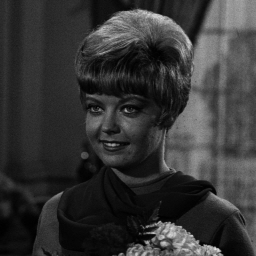

In [2]:
img = cv2.imread('/content/gdrive/My Drive/images/girl.jpg')
print(img.shape)
gimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg)

In [3]:
outimg = np.zeros(gimg.shape, dtype='uint8')

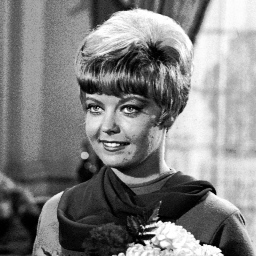

In [4]:
outimg = cv2.equalizeHist(gimg)
cv2_imshow(outimg)

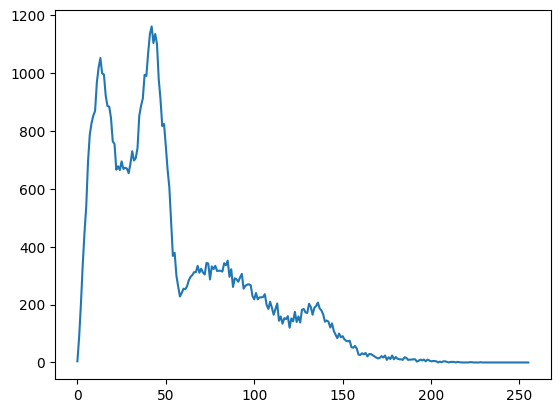

In [12]:
hist = cv2.calcHist([gimg], [0], None, [256], [0,256])
plt.plot(hist)

In [34]:
myHist = np.zeros((256,1), dtype=np.int32)

히스토그램 만들기

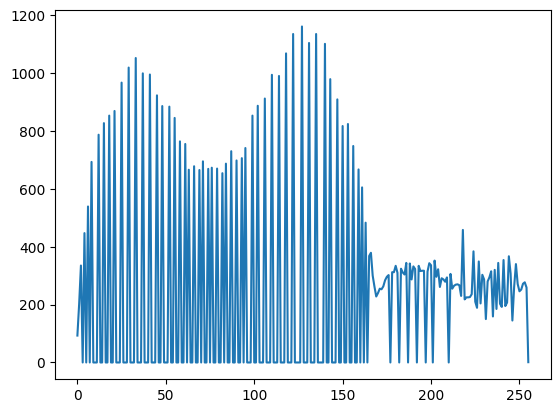

In [35]:
for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    myHist[outimg[h,w]] += 1

plt.plot(myHist)

In [36]:
cumulHist = np.zeros((256,1), dtype=np.int32)

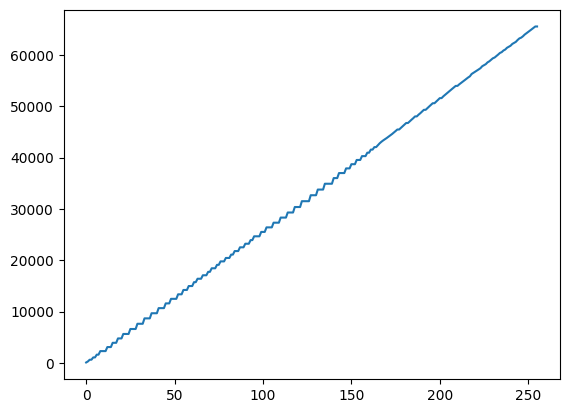

In [37]:
cumulHist[0] = myHist[0]
for i in range(1,256):
  cumulHist[i] = cumulHist[i-1] + myHist[i]

plt.plot(cumulHist)

히스토그램 평활화

In [31]:
equalHist = np.zeros((256,1), dtype=np.int32)

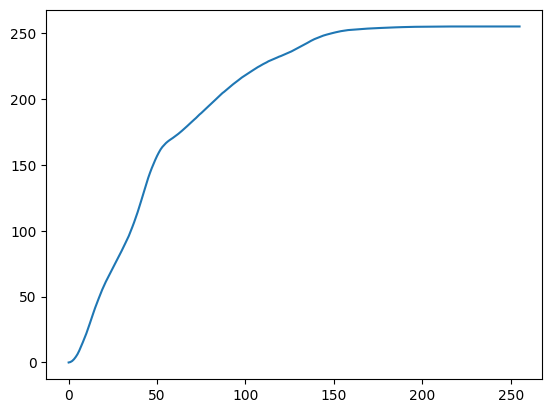

In [32]:
numOfPixel = gimg.shape[0] * gimg.shape[1]
equalHist = cumulHist / numOfPixel
equalHist = equalHist * 255

plt.plot(equalHist)

/tmp/ipython-input-1109175290.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outimg[h,w] = equalHist[gimg[h,w]]


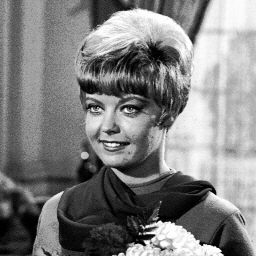

In [33]:
for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    outimg[h,w] = equalHist[gimg[h,w]]

cv2_imshow(outimg)